In [94]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [95]:
df=pd.read_csv('income.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


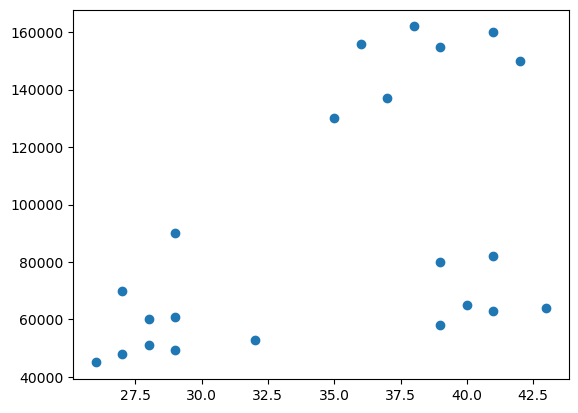

In [96]:
plt.scatter(df.Age,df['Income($)'])

In [97]:
km=KMeans(n_clusters=3)

In [98]:
km

KMeans(n_clusters=3)

In [99]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [100]:
df['cluster']=y_predicted

In [101]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [102]:
df0=df[df['cluster']==0]
df1=df[df['cluster']==1]
df2=df[df['cluster']==2]

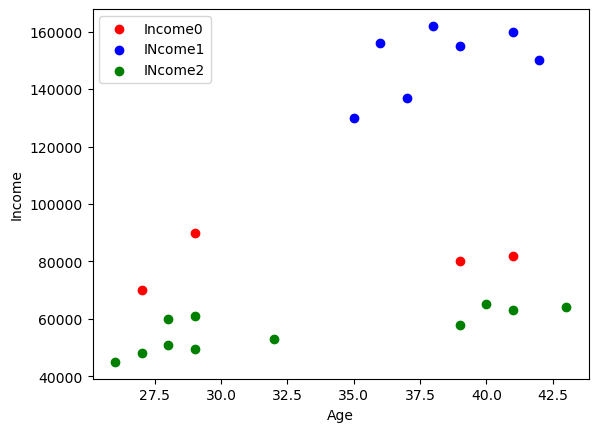

In [103]:
plt.scatter(df0.Age,df0['Income($)'],color='r')
plt.scatter(df1.Age,df1['Income($)'],color='b')
plt.scatter(df2.Age,df2['Income($)'],color='g')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(['Income0','INcome1','INcome2'])

In [104]:
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])

MinMaxScaler()

In [105]:
df['Income($)']=scaler.transform(df[['Income($)']])

In [106]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [107]:
df

,Name,Age,Income($),cluster
0,Rob,27,0.213675,0
1,Michael,29,0.384615,0
2,Mohan,29,0.136752,2
3,Ismail,28,0.128205,2
4,Kory,42,0.897436,1
5,Gautam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,1
8,Brad,36,0.948718,1
9,Angelina,35,0.726496,1


In [108]:
y_predicted=km.fit_predict(df[['Age','Income($)']])

D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [109]:
df['cluster']=y_predicted

In [110]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,0
1,Michael,29,0.384615,0
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1


In [111]:
km.cluster_centers_

array([[27.875     ,  0.12232906],
       [40.55555556,  0.44824311],
       [35.6       ,  0.70598291]])

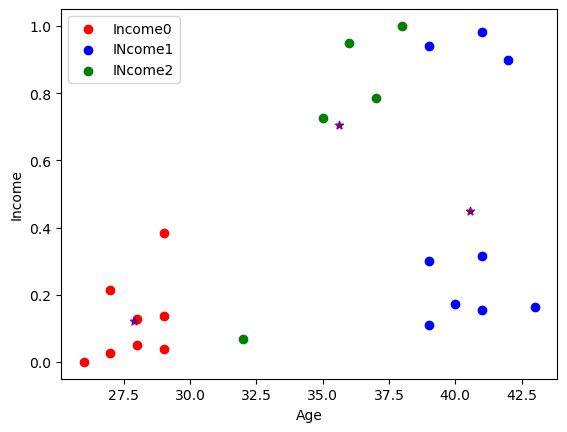

In [114]:
df0=df[df['cluster']==0]
df1=df[df['cluster']==1]
df2=df[df['cluster']==2]
plt.scatter(df0.Age,df0['Income($)'],color='r')
plt.scatter(df1.Age,df1['Income($)'],color='b')
plt.scatter(df2.Age,df2['Income($)'],color='g')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(['Income0','INcome1','INcome2'])

In [115]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

In [116]:
sse

[734.1763833270242,
 92.54628677464531,
 46.51741260217043,
 32.05547590928646,
 17.61742594418876,
 16.971275598412355,
 7.332677088659995,
 6.794494362870432,
 4.15054058002776]

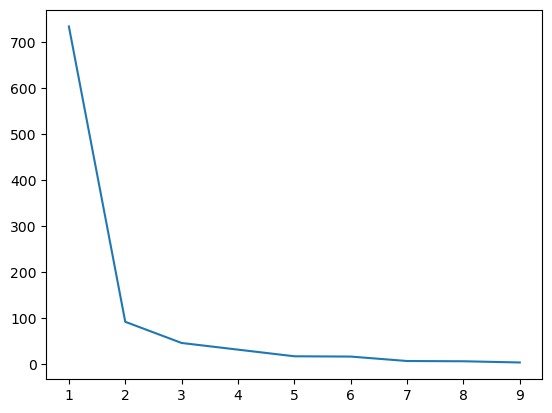

In [117]:
plt.plot(k_rng,sse)